In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["Thor hathodawala is  looking for a job of security guard for a bsnk"])

v.vocabulary_

{'thor': 18,
 'hathodawala': 6,
 'is': 8,
 'looking': 12,
 'for': 1,
 'job': 10,
 'of': 14,
 'security': 16,
 'guard': 4,
 'bsnk': 0,
 'thor hathodawala': 19,
 'hathodawala is': 7,
 'is looking': 9,
 'looking for': 13,
 'for job': 3,
 'job of': 11,
 'of security': 15,
 'security guard': 17,
 'guard for': 5,
 'for bsnk': 2}

In [15]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [27]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [31]:
corpus_processed = [preprocess(i) for i in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [33]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [43]:
v.transform(['Rohan ate pizza']).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [45]:
import pandas  as pd

In [47]:
df = pd.read_json('news_dataset.json')

In [51]:
df

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [53]:
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [59]:
## This is imbalanced dataset, we will handle this by doing under_sampling, not a best way but let's do
min_samples = 1381
df_business = df[df['category']=='BUSINESS'].sample(min_samples, random_state=2002)
df_sports = df[df['category']=='SPORTS'].sample(min_samples, random_state=2002)
df_crime = df[df['category']=='CRIME'].sample(min_samples, random_state=2002)
df_science = df[df['category']=='SCIENCE'].sample(min_samples, random_state=2002)

In [61]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science])
df_balanced.head()

,text,category
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS
87,Microsoft Just Upgraded Its Parental Leave Pol...,BUSINESS
5644,"After March 2, Reverse Mortgage Borrowers Will...",BUSINESS
10156,Elon Musk Just Dropped Another Hint That Tesla...,BUSINESS
4138,"Turning Dream Jobs Into Reality: Photographer,...",BUSINESS


In [65]:
df_balanced['category'].value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [73]:
target = {'BUSINESS':0, 'SPORTS':1, 'CRIME':2, 'SCIENCE':3}

df_balanced['category_num'] = df_balanced['category'].map(target)
df_balanced

,text,category,category_num
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS,0
87,Microsoft Just Upgraded Its Parental Leave Pol...,BUSINESS,0
5644,"After March 2, Reverse Mortgage Borrowers Will...",BUSINESS,0
10156,Elon Musk Just Dropped Another Hint That Tesla...,BUSINESS,0
4138,"Turning Dream Jobs Into Reality: Photographer,...",BUSINESS,0
...,...,...,...
12544,Does Penis Size Matter?,SCIENCE,3
467,Chris Hadfield Reveals His Hidden Talent--And ...,SCIENCE,3
12383,Cincinnati Zoo's Premature Baby Hippo Takes Wo...,SCIENCE,3
8230,Starry-Eyed Scientists Discover 'Beast Of A Ga...,SCIENCE,3


In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['text'],
    df_balanced['category_num'],
    test_size=0.2,
    stratify=df_balanced['category_num'],
    random_state=2002
)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4419,), (1105,), (4419,), (1105,))

In [85]:
y_train.value_counts(), y_test.value_counts()

(0    1105
 2    1105
 3    1105
 1    1104
 Name: category_num, dtype: int64,
 1    277
 0    276
 3    276
 2    276
 Name: category_num, dtype: int64)

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [103]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       276
           1       0.91      0.86      0.88       277
           2       0.88      0.91      0.89       276
           3       0.91      0.81      0.86       276

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [107]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,3))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       276
           1       0.94      0.82      0.87       277
           2       0.87      0.89      0.88       276
           3       0.92      0.76      0.83       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



In [109]:
X_test[:5]

9536    Deutsche Bank Won't Expand In North Carolina B...
8795    How to Be a Hero: Insight From the Milgram Exp...
9313               LIVE: Argentina Takes On Bosnia-Herz. 
4377    Olympics Snafu Sees U.S. Champion Curlers Rece...
5993    How Much Is A Boss Worth? An awful lot of Amer...
Name: text, dtype: object

In [113]:
y_pred[:5],y_test[:5]

(array([0, 3, 1, 1, 0]),
 9536    0
 8795    3
 9313    1
 4377    1
 5993    0
 Name: category_num, dtype: int64)

In [115]:
target

{'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

In [125]:
## Now lets try some preprocessing and build the model again
df_balanced['preprocessed_text'] = df_balanced.text.apply(preprocess)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['preprocessed_text'],
    df_balanced['category_num'],
    test_size=0.2,
    stratify=df_balanced['category_num'],
    random_state=2002
)


clf = Pipeline([
    ('vectorizer_bow',CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       276
           1       0.92      0.87      0.89       277
           2       0.86      0.92      0.89       276
           3       0.91      0.84      0.87       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [131]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [133]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[246,  10,  12,   8],
       [  8, 241,  17,  11],
       [ 11,   6, 254,   5],
       [ 27,   5,  12, 232]])

Text(50.722222222222214, 0.5, 'Truth')

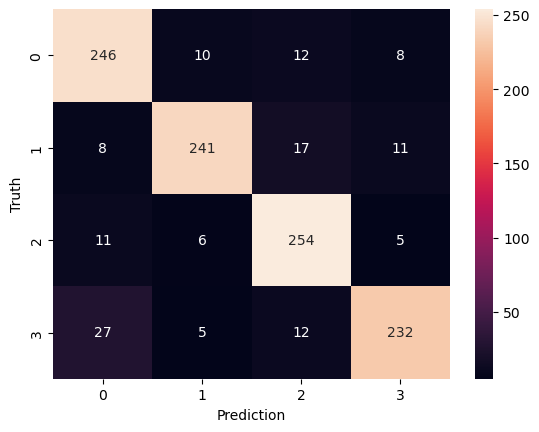

In [145]:
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')